In [1]:
from sklearn.datasets import load_iris

dataset = load_iris()
x = dataset['data']
y = dataset['target']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

print("Training samples: ", len(x_train))
print("Testing samples: ", len(x_test))

Training samples:  105
Testing samples:  45


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
from sklearn import metrics

y_pred = classifier.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Model Accuracy: ", accuracy)

Model Accuracy:  1.0


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

range_k = range(1, 15)
scores = {}
scores_list = []

for k in range_k:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

mtrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(mtrix)

report = metrics.classification_report(y_test, y_pred)
print("Classification Report: ")
print(report)

Confusion Matrix: 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Text(0, 0.5, 'Accuracy')

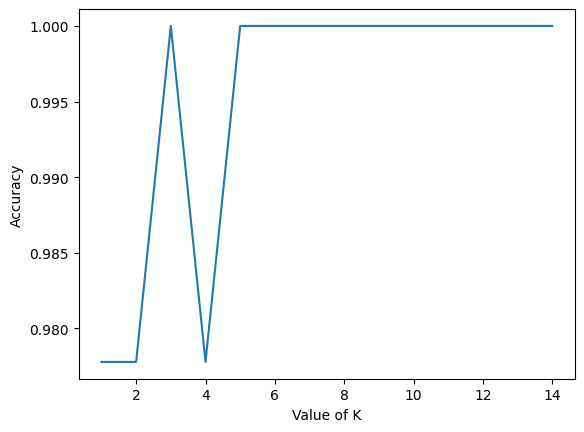

In [20]:
import matplotlib.pyplot as plt

plt.plot(range_k, scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")